In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Czyszczenie danych

In [2]:
data = df[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App']).max().dropna().reset_index()
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
data["Reviews"] = pd.to_numeric(data["Reviews"])
data = data[data["Type"] == "Free"]
mydata = data[["Category", "Rating", "Reviews", "Installs"]]
mydata

<ipython-input-2-7fff421c9af9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))


,Category,Rating,Reviews,Installs
0,SOCIAL,4.5,40467,1000000
1,COMICS,3.5,115,10000
2,TOOLS,4.5,259,10000
3,COMMUNICATION,4.7,573,10000
4,NEWS_AND_MAGAZINES,4.4,27,100
...,...,...,...,...
8190,FAMILY,4.3,55408,1000000
8191,COMICS,4.4,190,10000
8193,SOCIAL,4.6,22098,1000000
8194,TOOLS,4.0,19,10000


spradzenie typu danych (liczbowe / tekstowe)

In [3]:
mydata.dtypes

Category     object
Rating      float64
Reviews       int64
Installs      int64
dtype: object

TOP 10 kategorii według 'Rating'

In [4]:
cat_rating = mydata[["Category","Rating"]].groupby("Category").describe().reset_index()
cat_rating.columns = cat_rating.columns.droplevel()
cat_rating = cat_rating.sort_values("count", ascending=False)
cat_rating.columns = ["Category", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_rating.iloc[:10]

,Category,count,mean,std,min,25%,50%,75%,max
11,FAMILY,1492.0,4.171917,0.511395,1.0,3.9,4.3,4.5,5.0
14,GAME,835.0,4.235569,0.384523,1.0,4.1,4.3,4.5,5.0
29,TOOLS,656.0,4.028049,0.617139,1.0,3.8,4.2,4.4,5.0
12,FINANCE,289.0,4.128374,0.647504,1.0,4.0,4.3,4.5,5.0
18,LIFESTYLE,283.0,4.083392,0.712184,1.5,3.8,4.2,4.6,5.0
25,PRODUCTIVITY,283.0,4.181979,0.531017,1.0,4.0,4.3,4.5,5.0
4,BUSINESS,253.0,4.097233,0.661552,1.0,3.8,4.2,4.5,5.0
24,PHOTOGRAPHY,248.0,4.166129,0.482216,2.0,4.0,4.3,4.5,5.0
28,SPORTS,240.0,4.215417,0.472211,1.5,4.0,4.3,4.5,5.0
6,COMMUNICATION,235.0,4.128936,0.444449,1.0,4.0,4.2,4.4,5.0


TOP 10 kategorii według 'Reviews' - sortowane po ilości

In [5]:
cat_reviews = mydata[["Category","Reviews"]].groupby("Category").describe().reset_index()
cat_reviews.columns = cat_reviews.columns.droplevel()
cat_reviews = cat_reviews.sort_values("count", ascending=False)
cat_reviews.columns = ["Category reviews - by count", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_reviews.iloc[:10]

,Category reviews - by count,count,mean,std,min,25%,50%,75%,max
11,FAMILY,1492.0,1.125237e+05,5.161012e+05,1.0,105.75,1839.5,31623.25,10053186.0
14,GAME,835.0,7.143802e+05,2.609390e+06,1.0,2817.00,43090.0,317554.00,44893888.0
29,TOOLS,656.0,3.494788e+05,2.294336e+06,1.0,79.00,1505.5,37401.50,42916526.0
12,FINANCE,289.0,4.373513e+04,1.496007e+05,1.0,103.00,922.0,20672.00,1374549.0
18,LIFESTYLE,283.0,4.164048e+04,2.060567e+05,1.0,42.50,628.0,9438.00,2789775.0
25,PRODUCTIVITY,283.0,1.958269e+05,5.722077e+05,1.0,171.00,7801.0,80350.00,5383985.0
4,BUSINESS,253.0,3.824740e+04,1.589835e+05,1.0,17.00,183.0,6989.00,1279800.0
24,PHOTOGRAPHY,248.0,4.243431e+05,1.213145e+06,1.0,1763.25,36890.0,246199.75,10859051.0
28,SPORTS,240.0,2.470151e+05,1.188415e+06,1.0,813.00,9201.5,81395.75,14201891.0
6,COMMUNICATION,235.0,1.216716e+06,6.149623e+06,1.0,279.00,22782.0,190822.50,69119316.0


TOP 10 kategorii według 'Reviews' - sortowane po średniej

In [6]:
cat_reviews = mydata[["Category","Reviews"]].groupby("Category").describe().reset_index()
cat_reviews.columns = cat_reviews.columns.droplevel()
cat_reviews = cat_reviews.sort_values("mean", ascending=False)
cat_reviews.columns = ["Category reviews - by mean", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_reviews.iloc[:10]

,Category reviews - by mean,count,mean,std,min,25%,50%,75%,max
6,COMMUNICATION,235.0,1.216716e+06,6.149623e+06,1.0,279.00,22782.0,190822.50,69119316.0
27,SOCIAL,201.0,1.134009e+06,7.353340e+06,2.0,241.00,10743.0,161610.00,78158306.0
14,GAME,835.0,7.143802e+05,2.609390e+06,1.0,2817.00,43090.0,317554.00,44893888.0
31,VIDEO_PLAYERS,145.0,4.664178e+05,2.364113e+06,3.0,321.00,7335.0,138337.00,25655305.0
24,PHOTOGRAPHY,248.0,4.243431e+05,1.213145e+06,1.0,1763.25,36890.0,246199.75,10859051.0
29,TOOLS,656.0,3.494788e+05,2.294336e+06,1.0,79.00,1505.5,37401.50,42916526.0
26,SHOPPING,178.0,2.503000e+05,8.719636e+05,1.0,1767.75,21831.5,106541.75,6212081.0
28,SPORTS,240.0,2.470151e+05,1.188415e+06,1.0,813.00,9201.5,81395.75,14201891.0
23,PERSONALIZATION,233.0,2.285393e+05,9.399089e+05,2.0,164.00,4724.0,62301.00,7464996.0
25,PRODUCTIVITY,283.0,1.958269e+05,5.722077e+05,1.0,171.00,7801.0,80350.00,5383985.0


TOP 10 kategorii według 'Installs' - sortowane po ilości

In [7]:
cat_installs = mydata[["Category","Installs"]].groupby("Category").describe().reset_index()
cat_installs.columns = cat_installs.columns.droplevel()
cat_installs = cat_installs.sort_values("count", ascending=False)
cat_installs.columns = ["Category installs - by count", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_installs.iloc[:10]

,Category installs - by count,count,mean,std,min,25%,50%,75%,max
11,FAMILY,1492.0,4.006925e+06,2.820366e+07,10.0,10000.0,100000.0,1000000.0,1.000000e+09
14,GAME,835.0,1.644654e+07,5.455685e+07,5.0,100000.0,1000000.0,10000000.0,1.000000e+09
29,TOOLS,656.0,1.219208e+07,6.102643e+07,10.0,10000.0,100000.0,5000000.0,1.000000e+09
12,FINANCE,289.0,1.574833e+06,6.889417e+06,50.0,10000.0,50000.0,1000000.0,1.000000e+08
18,LIFESTYLE,283.0,1.775837e+06,7.091219e+06,10.0,5000.0,50000.0,1000000.0,1.000000e+08
25,PRODUCTIVITY,283.0,2.044756e+07,8.595287e+07,10.0,10000.0,1000000.0,5000000.0,1.000000e+09
4,BUSINESS,253.0,2.734409e+06,1.132048e+07,5.0,1000.0,10000.0,1000000.0,1.000000e+08
24,PHOTOGRAPHY,248.0,1.877526e+07,6.835187e+07,10.0,100000.0,3000000.0,10000000.0,1.000000e+09
28,SPORTS,240.0,5.396615e+06,1.512259e+07,5.0,50000.0,500000.0,5000000.0,1.000000e+08
6,COMMUNICATION,235.0,4.698673e+07,1.718874e+08,10.0,10000.0,1000000.0,10000000.0,1.000000e+09


TOP 10 kategorii według 'Installs' - sortowane po średniej

In [8]:
cat_installs = mydata[["Category","Installs"]].groupby("Category").describe().reset_index()
cat_installs.columns = cat_installs.columns.droplevel()
cat_installs = cat_installs.sort_values("mean", ascending=False)
cat_installs.columns = ["Category", "count", "mean", "std", "min", "25%", "50%", "75%", "max"]
cat_installs.iloc[:10]

,Category,count,mean,std,min,25%,50%,75%,max
6,COMMUNICATION,235.0,4.698673e+07,1.718874e+08,10.0,10000.0,1000000.0,10000000.0,1.000000e+09
27,SOCIAL,201.0,2.730266e+07,1.312665e+08,5.0,10000.0,500000.0,5000000.0,1.000000e+09
31,VIDEO_PLAYERS,145.0,2.711535e+07,1.244767e+08,100.0,10000.0,1000000.0,10000000.0,1.000000e+09
25,PRODUCTIVITY,283.0,2.044756e+07,8.595287e+07,10.0,10000.0,1000000.0,5000000.0,1.000000e+09
24,PHOTOGRAPHY,248.0,1.877526e+07,6.835187e+07,10.0,100000.0,3000000.0,10000000.0,1.000000e+09
14,GAME,835.0,1.644654e+07,5.455685e+07,5.0,100000.0,1000000.0,10000000.0,1.000000e+09
30,TRAVEL_AND_LOCAL,179.0,1.617138e+07,1.058985e+08,100.0,10000.0,1000000.0,5000000.0,1.000000e+09
29,TOOLS,656.0,1.219208e+07,6.102643e+07,10.0,10000.0,100000.0,5000000.0,1.000000e+09
21,NEWS_AND_MAGAZINES,202.0,1.172824e+07,8.572456e+07,50.0,10000.0,100000.0,1000000.0,1.000000e+09
3,BOOKS_AND_REFERENCE,161.0,1.034639e+07,8.003572e+07,5.0,10000.0,100000.0,1000000.0,1.000000e+09


Histogram 'Reviews'

7592


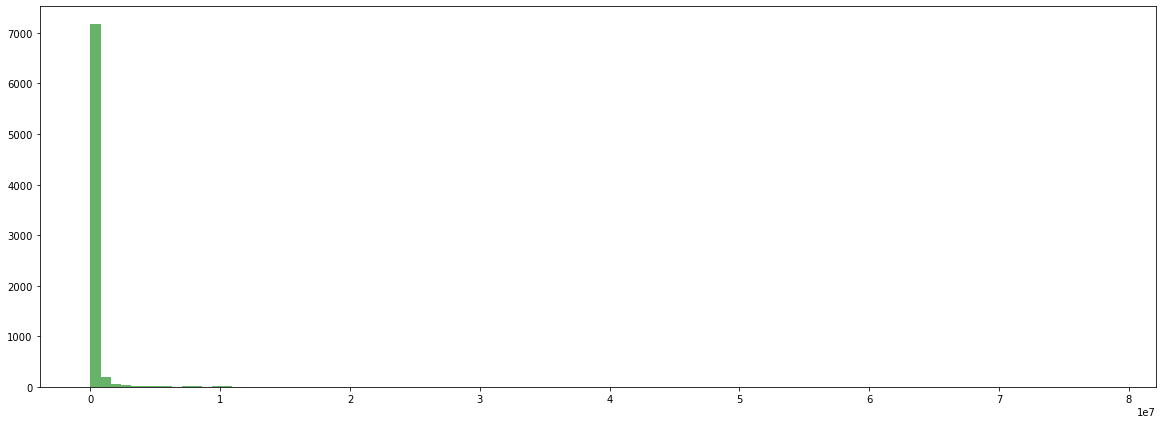

In [9]:
fig = plt.figure(figsize=(20, 7))
plot_data = data["Reviews"]
print(len(plot_data))

plt.hist(plot_data, bins=100, alpha=0.6, color='g')
plt.show()

Histogram 'Reviews' kwantyla 0.8

1519


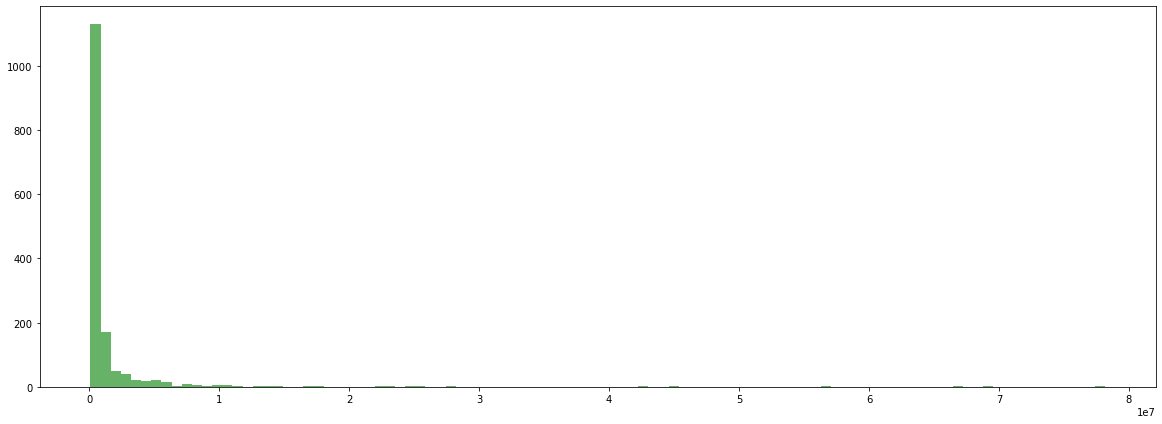

In [10]:
fig = plt.figure(figsize=(20, 7))
plot_data2 = data["Reviews"]
plot_data2 = plot_data2[plot_data2 > plot_data2.quantile(.8)]
print(len(plot_data2))

plt.hist(plot_data2, bins=100, alpha=0.6, color='g')
plt.show()

Scoreboard dla 'Category' według 'Installs' i 'Reviews' dla wszystkich aplikacji

In [11]:
rev_scores = data.sort_values(["Installs","Reviews"], ascending=False)
rev_scores = rev_scores.groupby(["Category"]).count().reset_index()
print("ilość aplikacji", rev_scores["App"].sum())
print("ilość kategorii", rev_scores["Category"].count())

rev_scores["Score"] = round(rev_scores["App"]/min(rev_scores["App"]))
rev_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)

ilość aplikacji 7592
ilość kategorii 33


,Category,App,Score
11,FAMILY,1492,36.0
14,GAME,835,20.0
29,TOOLS,656,16.0
12,FINANCE,289,7.0
18,LIFESTYLE,283,7.0
25,PRODUCTIVITY,283,7.0
4,BUSINESS,253,6.0
24,PHOTOGRAPHY,248,6.0
28,SPORTS,240,6.0
6,COMMUNICATION,235,6.0


Scoreboard dla 'Category' według 'Installs' i 'Reviews' z kwantylem

In [12]:
q = .8
pop = data[data["Installs"] > data["Installs"].quantile(q)]
pop = pop[pop["Reviews"] > pop["Reviews"].quantile(q)]
pop.sort_values(["Installs","Reviews"], ascending=False)

rev_scores = pop.sort_values(["Installs","Reviews"], ascending=False)
rev_scores = rev_scores.groupby(["Category"]).count().reset_index()
print("ilość aplikacji", rev_scores["App"].sum())
print("ilość kategorii", rev_scores["Category"].count())

rev_scores["Score"] = round(rev_scores["App"]/min(rev_scores["App"]))
rev_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)

ilość aplikacji 274
ilość kategorii 20


,Category,App,Score
5,GAME,93,93.0
3,FAMILY,31,31.0
1,COMMUNICATION,27,27.0
16,TOOLS,22,22.0
11,PHOTOGRAPHY,20,20.0
14,SOCIAL,13,13.0
12,PRODUCTIVITY,13,13.0
15,SPORTS,9,9.0
10,PERSONALIZATION,8,8.0
13,SHOPPING,8,8.0


Zmiana kolumny 'Size' z tekstowej na numeryczna 'Size mb' 

In [13]:
size = data[:]
size = size[size["Size"] != "Varies with device"]
size["Size number"] = pd.to_numeric(size["Size"].str[:-1])
size["Size units"] = size["Size"].str[-1:]
size["unit bytes"] = size["Size units"].apply(lambda x: 1/1024 if x == "k" else 1)
size["unit bytes"] = pd.to_numeric(size["unit bytes"])
size["Size mb"] = size["Size number"] * size["unit bytes"]
size = size.iloc[:,[0,1,2,3,4,5,6,7,11]]
size.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Size mb
0,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000,Free,Everyone,22.000000
1,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000,Free,Mature 17+,9.100000
2,.R,TOOLS,4.5,259,203k,10000,Free,Everyone,0.198242
3,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,Mature 17+,53.000000
4,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100,Free,Everyone,14.000000


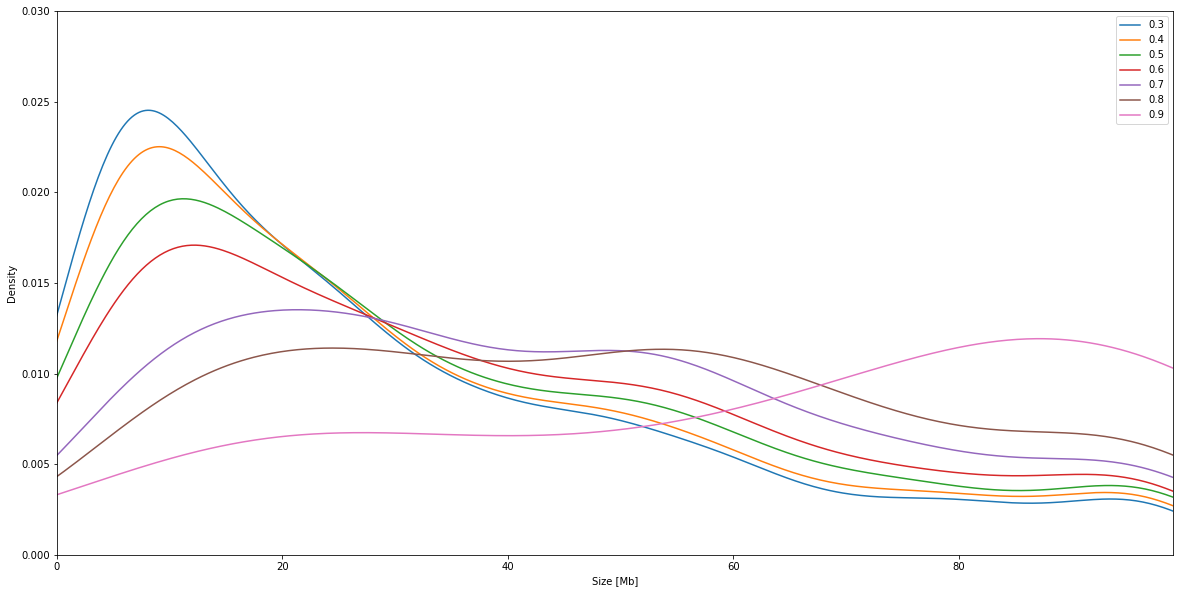

In [14]:
plt.figure(figsize=(20,10))
quantiles = np.arange(0.3, 1, 0.1).round(1)
quantiles.round()
for q in quantiles:
    t = size[size["Installs"] > size["Installs"].quantile(q)]
    t = t[t["Reviews"] > t["Reviews"].quantile(q)]
    t["Size mb"].plot.density(xlim=(0,t["Size mb"].max()), ylim=(0,.03))
    plt.xlabel("Size [Mb]")
    plt.legend(quantiles)
pass

Scoreboard dla 'Content Rating' według 'Installs' i 'Reviews'

In [15]:
content_scores = pop.sort_values(["Installs","Reviews"], ascending=False)
content_scores = content_scores.groupby(["Content Rating"]).count().reset_index()
content_scores.iloc[:,:2].sort_values(["App"], ascending=False)

,Content Rating,App
0,Everyone,176
3,Teen,64
1,Everyone 10+,20
2,Mature 17+,14


Próbny scoreboard dla Rating

In [16]:
d = pop.sort_values(["Installs","Reviews"], ascending=False)
d = d.groupby(["Rating"]).count().reset_index()
d.iloc[:,:2].sort_values(["App"], ascending=False)

,Rating,App
7,4.4,66
8,4.5,61
9,4.6,52
6,4.3,48
5,4.2,16
10,4.7,15
4,4.1,5
3,4.0,4
11,4.8,4
0,3.7,1


TOP 10 aplikacji według 'Installs' i 'Reviews' z filtrowaniem do wybranej kategorii

In [17]:
top = data[data["Category"] == "FAMILY"].sort_values(["Installs","Reviews"], ascending=False).iloc[:10]
top

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
4009,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,Teen
4177,Hay Day,FAMILY,4.5,10053186,94M,100000000,Free,Everyone
2861,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,100000000,Free,Everyone
5453,Netflix,FAMILY,4.4,5456708,Varies with device,100000000,Free,Teen
6974,Talking Tom Cat 2,FAMILY,4.3,3213548,55M,100000000,Free,Everyone 10+
1466,Bubble Witch 2 Saga,FAMILY,4.3,2838064,Varies with device,100000000,Free,Everyone
1307,Bitmoji – Your Personal Emoji,FAMILY,4.6,2312084,Varies with device,100000000,Free,Teen
6973,Talking Tom Cat,FAMILY,4.3,1838090,Varies with device,100000000,Free,Everyone 10+
6967,Talking Ginger,FAMILY,4.2,1752017,52M,100000000,Free,Everyone
6965,Talking Ben the Dog,FAMILY,4.3,1633682,57M,100000000,Free,Everyone
